In [2]:
#Esteban Gomez 

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
df = pd.read_csv('weather.csv')
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


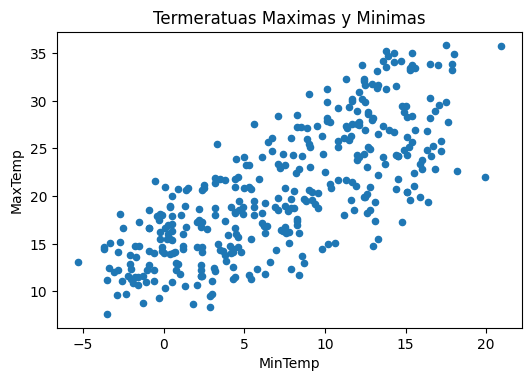

In [5]:
fig, ax = plt.subplots(figsize=(6, 3.84))

df.plot(
    x    = 'MinTemp',
    y    = 'MaxTemp',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Termeratuas Maximas y Minimas');

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from scipy.stats import pearsonr

In [11]:
# Correlación lineal entre las variables
corr_test = pearsonr(x = df['MinTemp'], y =  df['MaxTemp'])
print("correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

correlación de Pearson:  0.7524707945910014
P-value:  5.347541160124869e-68


In [31]:
# definimos x e y
x = df['MinTemp'].values
y = df['MaxTemp'].values
model = LinearRegression()

In [33]:
kf = KFold(n_splits=5)
error = []
model = LinearRegression()
for train, test in kf.split(x):
  Xtrain = x[train]
  Ytrain = y[train]
  Xtest = x[test]
  Ytest = y[test]
  model = model.fit(Xtrain.reshape(-1,1), Ytrain.reshape(-1,1))
  ypred = model.predict(Xtest.reshape(-1,1))
  error.append(np.mean(ypred-Ytest)**2)
Error_total = np.mean(np.array(error))
Error_Estandar = np.std(np.array(error))
print(f'error test es: {error}')

error test es: [1.722893366968131, 1.7508549814370777, 0.1353775041275973, 23.391620609752795, 3.0573111359135074]


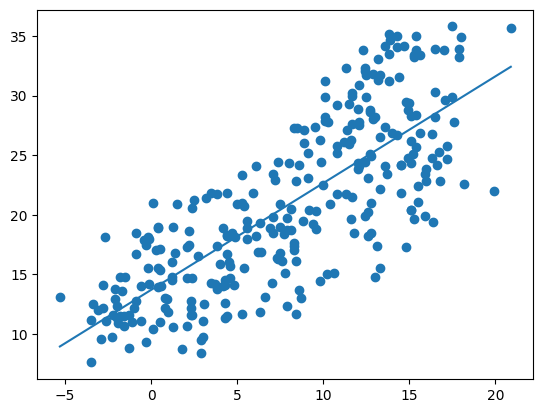

In [16]:
seta=np.linspace(Xtrain.min(), Xtrain.max(),1000)
funcion = model.predict(zeta.reshape(-1,1))
plt.figure()
plt.plot(zeta,funcion)
plt.scatter(Xtrain, Ytrain)

In [20]:
print(ypred)

[[13.69166157]
 [15.84203173]
 [13.15406903]
 [15.75243297]
 [10.37650757]
 [12.88527276]
 [12.34768022]
 [10.7349026 ]
 [13.60206281]
 [13.51246405]
 [14.13965535]
 [19.15718572]
 [17.36521059]
 [13.78126032]
 [16.55882178]
 [18.52999443]
 [18.88838945]
 [19.33638324]
 [12.88527276]
 [13.87085908]
 [10.37650757]
 [11.27249514]
 [11.45169265]
 [13.24366778]
 [21.75554967]
 [25.42909869]
 [21.4867534 ]
 [17.18601308]
 [14.31885286]
 [14.67724789]
 [18.26119816]
 [20.41156832]
 [17.90280313]
 [16.55882178]
 [20.68036459]
 [15.84203173]
 [16.55882178]
 [15.93163048]
 [19.51558075]
 [26.59388253]
 [18.08200064]
 [15.75243297]
 [14.94604416]
 [18.70919194]
 [28.74425269]
 [26.59388253]
 [22.9203335 ]
 [23.72672231]
 [13.96045784]
 [14.13965535]
 [14.13965535]
 [17.81320437]
 [21.03875961]
 [17.72360562]
 [19.69477826]
 [24.35391361]
 [21.93474718]
 [17.63400686]
 [18.1715994 ]
 [19.69477826]
 [21.12835837]
 [23.81632107]
 [21.75554967]
 [16.73801929]
 [16.55882178]
 [14.49805038]
 [16.64842

Coeficiente a: 0.6777113474123323
Intercepto b: -6.661579585866435


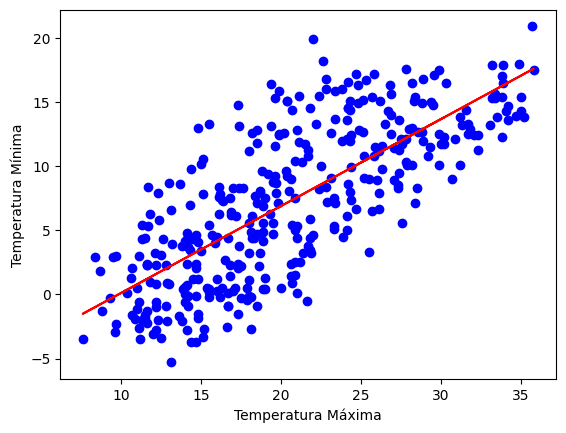

In [36]:
#2.Obtenga el modelo desde la metodologia de regresión teórica

X = np.array(data["MaxTemp"])
Y = np.array(data["MinTemp"])


model = LinearRegression()

model.fit(X.reshape(-1, 1), Y)


print("Coeficiente a:", model.coef_[0])
print("Intercepto b:", model.intercept_)

fig, ax = plt.subplots() # Crear una figura y un eje

ax.scatter(X, Y, color='blue') # Graficar los datos

ax.plot(X, model.predict(X.reshape(-1, 1)), color='red')

ax.set_xlabel("Temperatura Máxima")
ax.set_ylabel("Temperatura Mínima")

plt.show()

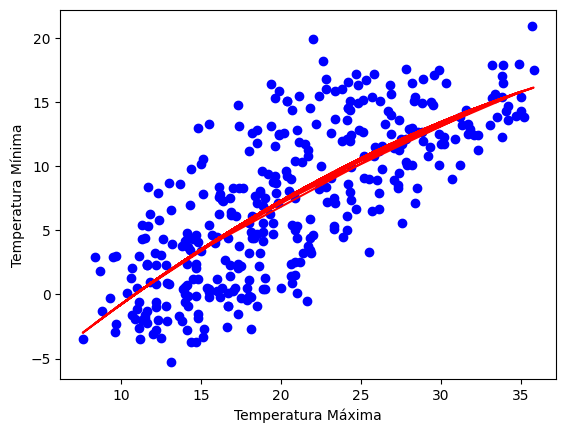

In [51]:
#4.Cree combinaciones de variables para mejorar su predicción.
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X = np.array(data["MaxTemp"]).reshape(-1, 1)
Y = np.array(data["MinTemp"])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)
fig, ax = plt.subplots()
ax.scatter(X, Y, color='blue')
ax.plot(X, model.predict(X_poly), color='red')

ax.set_xlabel("Temperatura Máxima")
ax.set_ylabel("Temperatura Mínima")

plt.show()
